<a href="https://colab.research.google.com/github/RassimCHEBLI/RassimCHEBLI/blob/circleci-project-setup/winequality_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [2]:
os.chdir('/content/drive/MyDrive/datascience_nlp')

In [17]:
!pip install scattertext
!pip install spacy
!pip install nltk
!pip install termcolor

     |████████████████████████████████| 7.3 MB 5.2 MB/s 
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=90d5b63558cd6c84ac4a8662474e1bf5193efed79a37832af577eb0d94cad4eb
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [18]:
!python -m spacy download fr_core_news_md

     |████████████████████████████████| 88.6 MB 1.4 MB/s 
  Created wheel for fr-core-news-md: filename=fr_core_news_md-2.2.5-py3-none-any.whl size=90338488 sha256=4cebc673631435fe6fa037c21e52ce2a48cf43a881ae611bc7ceb531bb02f54e
  Stored in directory: /tmp/pip-ephem-wheel-cache-4kzwhv5w/wheels/2e/26/ff/ce93eb966e7176ebe81e6c98209582e13e108cdd2d6d636df0
Successfully built fr-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
import seaborn as sns

# Modules de traitement du texte
import spacy
import fr_core_news_md
import nltk
import re
from termcolor import colored

# Modules pour le wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Module pour scattertext
import scattertext as st

# Modules de modélisation
from sklearn.utils.fixes import loguniform
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LinearRegression


In [20]:
ls

comments_1.csv   house.csv                 tweets_visualisation.html
data_corona.csv  tweets_politics_2022.csv  winequality-white.csv


In [13]:
df1=pd.read_csv('winequality-white.csv',delimiter=';')

In [56]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [21]:
df1[:20]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [29]:
df1.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [16]:
df1.shape

(4898, 12)

In [28]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [32]:
df_y= df1['residual sugar']

In [35]:
df_x= df1.drop('residual sugar', axis=1)

In [40]:
#random state : pour faire le split entre les deux 
X_train, X_test , y_train , y_test = train_test_split(df_x, df_y, test_size=.3 , random_state= 4567)

In [42]:
X_train.shape

(3428, 11)

In [43]:
X_test.shape

(1470, 11)

In [44]:
y_test.shape

(1470,)

In [45]:
y_train.shape

(3428,)

Model Training : Linear Regression



In [47]:
reg = LinearRegression().fit(X_train, y_train)

In [48]:
reg.coef_

array([-1.79283930e+00, -7.04846298e-01, -6.39251132e-01, -1.40276054e+01,
        1.99538440e-02, -5.81524347e-03,  2.32063969e+03, -8.92045844e+00,
       -3.83201653e+00,  2.30186833e+00,  2.95130991e-01])

In [55]:
#ces valeurs ont les a rammener de la première ligne de notre df 
reg.predict(np.array([[7,0.27,0.36,0.045,45.0,170.0,1.0010,3,0.45,8.8,6.6]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([20.42629563])

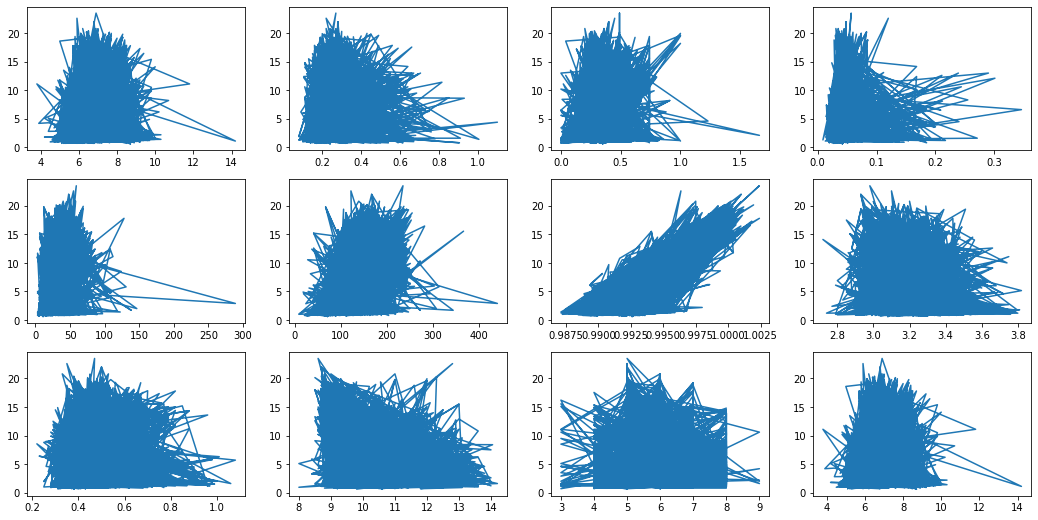

In [63]:
df1 = df1[df1['residual sugar'] <=25]
fig, ax = plt.subplots(3,4, figsize=(18,9))
ax[0,0].plot (df1['fixed acidity'], df1['residual sugar'])
ax[0,1].plot (df1['volatile acidity'], df1['residual sugar'])
ax[0,2].plot (df1['citric acid'], df1['residual sugar'])
ax[0,3].plot (df1['chlorides'], df1['residual sugar'])
ax[1,0].plot (df1['free sulfur dioxide'], df1['residual sugar'])
ax[1,1].plot (df1['total sulfur dioxide'], df1['residual sugar'])
ax[1,2].plot (df1['density'], df1['residual sugar'])
ax[1,3].plot (df1['pH'], df1['residual sugar'])
ax[2,0].plot (df1['sulphates'], df1['residual sugar'])
ax[2,1].plot (df1['alcohol'], df1['residual sugar'])
ax[2,2].plot (df1['quality'], df1['residual sugar'])
ax[2,3].plot (df1['fixed acidity'], df1['residual sugar'])

plt.show()




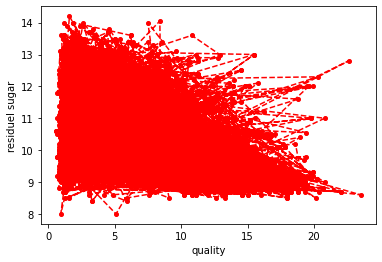

In [64]:
plt.xlabel('quality')
plt.ylabel('residuel sugar')

plt.plot(df1['residual sugar'],df1['alcohol'], 'ro',linestyle='--', markersize=4)


plt.show()


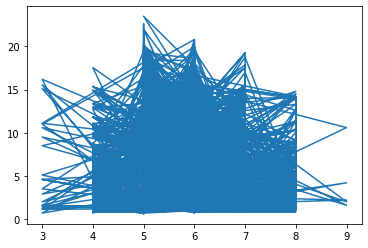

In [68]:
plt.plot(df1['quality'], df1['residual sugar'])
plt.show()

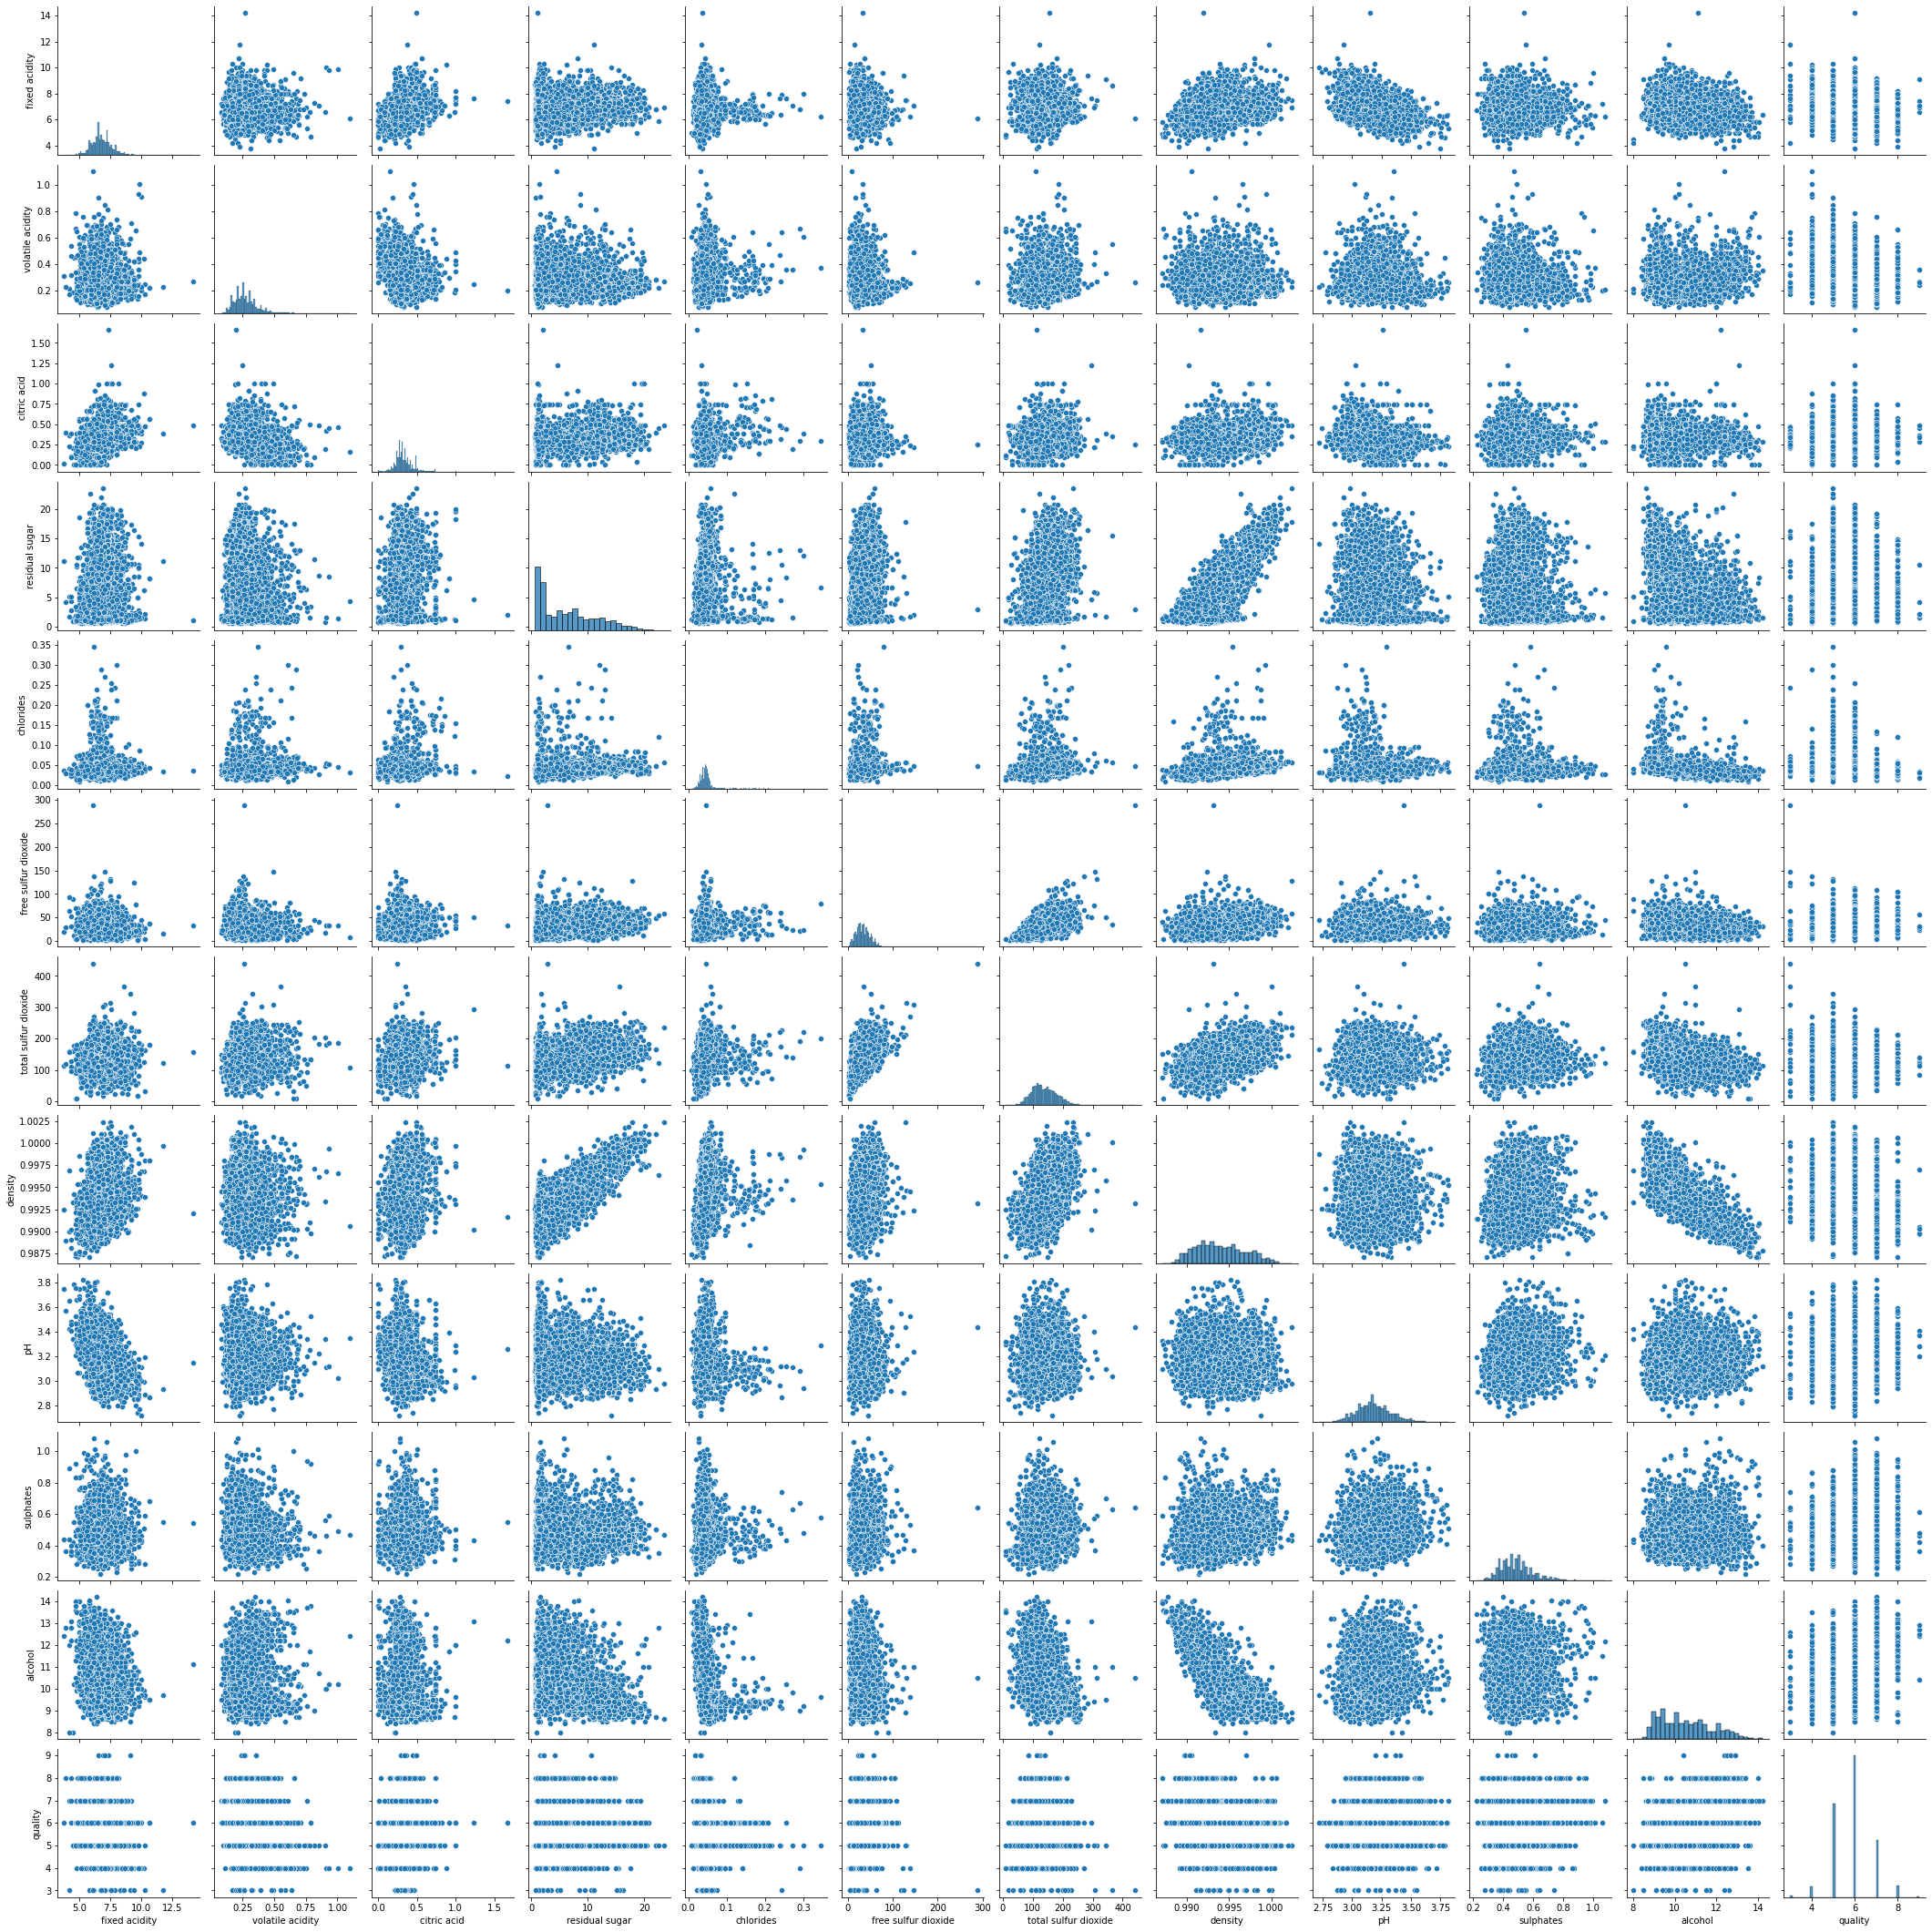

In [67]:
sns.pairplot(df1)

MODEL TRAINING : KNN 